In [1]:
"""
OBJETIVO : Realizar pruebas manuales con los mejores modelos escogidos, 
            de esta forma analizaar su comportamiento con conjunto de datos
            personalizados.
            
"""
Autor='Diego Paredes'

In [2]:
#Manejo de Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox


#Machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Librerias estandar (Extras)
import re
import os
import time
import random
from datetime import datetime
import glob

In [3]:
"""
DEFINIMOS EL PATH DEL PROYECTO 
"""
with open('../../path_base.txt') as f:
    path_base = f.read()
path_base

'C:/Users/Shounen/Desktop/Ciclo XI/Tesis 2/NewTesis'

In [4]:
"""
VARIABLES GENERALES
"""

path_imagenes = 'F:/GOES/'      

products = ['C07','C08','C13']
times   = ['10','20','30','40','50','00']

In [5]:
def crearModelo2D(p,run):    
    # Imagen
    input_1 = tf.keras.layers.Input(shape=(p['margen'][run],p['margen'][run],p['canales'][run]))
    
    # Convulutional layers
    rescaling = tf.keras.layers.Rescaling(1./65536)(input_1)
    conv2d_1 = tf.keras.layers.Conv2D(128, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(rescaling)
    mxPool_1 = tf.keras.layers.MaxPooling2D()(conv2d_1)
    dropout_1  = tf.keras.layers.Dropout(0.2)(mxPool_1)
    
    conv2d_2 = tf.keras.layers.Conv2D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    mxPool_2 = tf.keras.layers.MaxPooling2D()(conv2d_2)
    dropout_2  = tf.keras.layers.Dropout(0.1)(mxPool_2)
    
    #conv2d_3 = tf.keras.layers.Conv2D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    #mxPool_3 = tf.keras.layers.MaxPooling2D()(conv2d_3)
    #dropout_3  = tf.keras.layers.Dropout(0.2)(mxPool_3)
    
    #conv2d_4 = tf.keras.layers.Conv2D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_3)
    #mxPool_4 = tf.keras.layers.MaxPooling2D()(conv2d_4)
    #dropout_4  = tf.keras.layers.Dropout(0.2)(mxPool_4)
    
    conv2d_5 = tf.keras.layers.Conv2D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_2)
    
    
    # Flatten layer :
    flatten = tf.keras.layers.Flatten()(conv2d_5)
    
    final = flatten
    listConcat = [flatten]
    listInputs = [input_1]
    
    if len(p['inputs'])>1:
        #Agregamos los otros atrbutos        
        for attr in p['inputs'][1:]:
            # The other input
            input_x = tf.keras.layers.Input(shape=(1,))
            listConcat.append(input_x)
            listInputs.append(input_x)

            
        # Concatenate
        final = tf.keras.layers.Concatenate()(listConcat)
        
    dense_1 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(final)
    #dense_2 = tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu)(dense_1)
    dense_3 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(dense_1)
    
        
    # output
    if p['redTipo'] == 'regresion':
        output = tf.keras.layers.Dense(units=1)(dense_3)
        dimOutput = 1
    elif p['redTipo'] == 'clasificacion':
        output = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(dense_3)#units=1, activation=tf.keras.activations.relu)(dense_3)
        dimOutput = 2
    else:
        print(f"No se pudo crear el modelo outputs no esta bien definido {p['redTipo']}")
        return -1      
    

    full_model = tf.keras.Model(inputs=listInputs, outputs=[output])
        
    #print(full_model.summary())
    return full_model

In [6]:
def crearModelo3D(p,run):        
    # Imagen
    input_1 = tf.keras.layers.Input(shape=(p['tiempos'][run],p['margen'][run],p['margen'][run],p['canales'][run]))
    
    # Convulutional layers
    rescaling = tf.keras.layers.Rescaling(1./65536)(input_1)
    conv3d_1 = tf.keras.layers.Conv3D(128, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(rescaling)
    #mxPool_1 = tf.keras.layers.MaxPooling3D()(conv3d_1)
    dropout_1  = tf.keras.layers.Dropout(0.2)(conv3d_1)
    
    conv3d_2 = tf.keras.layers.Conv3D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    mxPool_2 = tf.keras.layers.MaxPooling3D()(conv3d_2)
    dropout_2  = tf.keras.layers.Dropout(0.1)(mxPool_2)
    
    #conv2d_3 = tf.keras.layers.Conv3D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    #mxPool_3 = tf.keras.layers.MaxPooling3D()(conv2d_3)
    #dropout_3  = tf.keras.layers.Dropout(0.2)(mxPool_3)
    
    #conv2d_4 = tf.keras.layers.Conv3D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_3)
    #mxPool_4 = tf.keras.layers.MaxPooling3D()(conv2d_4)
    #dropout_4  = tf.keras.layers.Dropout(0.2)(mxPool_4)
    
    conv3d_5 = tf.keras.layers.Conv3D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_2)
    
    
    # Flatten layer :
    flatten = tf.keras.layers.Flatten()(conv3d_5)
    
    final = flatten
    listConcat = [flatten]
    listInputs = [input_1]
    
    if len(p['inputs'])>1:
        #Agregamos los otros atrbutos        
        for attr in p['inputs'][1:]:
            # The other input
            input_x = tf.keras.layers.Input(shape=(1,))
            listConcat.append(input_x)
            listInputs.append(input_x)

            
        # Concatenate
        final = tf.keras.layers.Concatenate()(listConcat)
        
    dense_1 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(final)
    #dense_2 = tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu)(dense_1)
    dense_3 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(dense_1)
    
        
    # output
    if p['redTipo'] == 'regresion':
        output = tf.keras.layers.Dense(units=1)(dense_3)
        dimOutput = 1
    elif p['redTipo'] == 'clasificacion':
        output = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(dense_3)#units=1, activation=tf.keras.activations.relu)(dense_3)
        dimOutput = 2
    else:
        print(f"No se pudo crear el modelo outputs no esta bien definido {p['redTipo']}")
        return -1      
    

    full_model = tf.keras.Model(inputs=listInputs, outputs=[output])
        
    #print(full_model.summary())
    return full_model

In [7]:
def crearModelo(params,run):    
    if params['meanMatrizImagen']:
        #print(f"Creando modelo 2D")
        #print(f"HP :(T:{params['tiempos'][run]} - M:{params['margen'][run]} - C:{params['canales'][run]}) y  tipo ({params['redTipo']})")
        modelo = crearModelo2D(params,run)
    else:
        #print(f"Creando modelo 3D")
        #print(f"HP :(T:{params['tiempos'][run]} - M:{params['margen'][run]} - C:{params['canales'][run]}) y  tipo ({params['redTipo']})")
        modelo = crearModelo3D(params,run)

    return modelo

In [8]:
#Transformamos un filename tensor en una imagen
def read_png_file(item, value, p,run, path_base, products, times):
    # imagenData[0] = XO     # imagenData[1] = XA     # imagenData[2] = Fecha
    imagenData = tf.strings.split(item['imagen'], sep='--')
    size = int(p['margen'][run] / 2)

    timeJoin = []
    for j in range(p['tiempos'][run]-1,-1,-1):
        filename = path_base + 'PNG/' + imagenData[2] + '/' + imagenData[2] + '_' + str(j) + '.png'
        
        image_string = tf.io.read_file(filename)

        img_decoded = tf.io.decode_png(image_string, dtype=tf.uint16, channels=3)
        
        
                
        timeJoin.insert(0,img_decoded[int(imagenData[1]) - size:int(imagenData[1]) + size,
                                      int(imagenData[0]) - size:int(imagenData[0]) + size,
                                      0:p['canales'][run]])
 
        
    if p['tiempos'][run]==1:
        imagenData = tf.reshape(timeJoin[0],(p['margen'][run],p['margen'][run],p['canales'][run]))
    else:
        if p['meanMatrizImagen']:        
            img = tf.reduce_mean( timeJoin , axis=0 )
            imagenData = tf.reshape(img,(p['margen'][run],p['margen'][run],p['canales'][run]))
        else:
            img = tf.stack(timeJoin, axis=0)
            imagenData = tf.reshape(img,(p['tiempos'][run],p['margen'][run],p['margen'][run],p['canales'][run]))
        
    
    
    if len(p['inputs']) == 1:
        return imagenData, int(value)
    
    item['imagen'] = imagenData
    itemL = []
    for inpL in p['inputs']:
        itemL.append(item[inpL])
    
    return tuple(itemL), int(value)

In [9]:
def evaluarModelo(dsPruebas,modelo, p_train):
    inputsList = {}
    for inp in p_train['inputs']:
        inputsList[inp] = dsPruebas[inp].tolist()       

    dsP = tf.data.Dataset.from_tensor_slices(((inputsList),dsPruebas[p_train['outputs']].tolist()))      
    dsP = dsP.map(lambda x ,y : read_png_file(x,y,p_train,0,path_imagenes,products,times))
    dsP = dsP.batch(p_train['batch'])#.prefetch(tf.data.AUTOTUNE)  
    
    hist = modelo.predict(dsP, verbose=1)
    
    return hist

In [10]:
# Buscamos el DS validacion
def getDataset(path_base, model, dsTipo, dirName):
    if 'CLASE' in model.upper():
        print(f'Se encontro dataset {dsTipo} para CLASE')
        if dsTipo == 'Entrenamiento':
            DAName = 'SplitConDA_V1' if '_DA' in dirName else 'SplitSinDA_V1'
            dsName =  dirName.split('\\')[-2]
            pruebasFile = f'{path_base}/Archivos/Dataset/Clasificacion/{dsTipo}/{DAName}/{dsName}.csv' # ClasV1
        else:
            pruebasFile = f'{path_base}/Archivos/Dataset/Clasificacion/{dsTipo}/ClaseV1_{dsTipo}DS.csv' # ClasV1
        inputs = ['imagen', 'dato']
        outputs = 'clase'

    elif 'EST' in model:
        print(f'Se encontro dataset {dsTipo} para EST')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_EST_{dsTipo}DS.csv' # Reg EST
        inputs = ['imagen']
        outputs = 'dato'

    elif 'DatoV1' in model:            
        print(f'Se encontro dataset {dsTipo} para DatoV1')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/DatoV1_{dsTipo}DS.csv' # Reg V1
        inputs = ['imagen']
        outputs = 'dato'
    
    elif 'Dato_V2' in model:
        print(f'Se encontro dataset {dsTipo} para Dato_V2')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_V2_{dsTipo}DS.csv' # Reg V2
        inputs = ['imagen']
        outputs = 'dato'
    
    elif 'Dato_V3' in model:
        print(f'Se encontro dataset {dsTipo} para Dato_V3')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_V3_{dsTipo}DS.csv' # Reg V3
        inputs = ['imagen']
        outputs = 'dato'
        

    else:
        print(f"NO SE PUDO ENCONTRAR DS VALIDACION PARA: {model}")
        return -1 
    
    return pruebasFile, inputs, outputs

In [11]:
def getMetrics(modelType, lr, paciencia):
    
    if modelType == 'clasificacion':    
        optimizer = keras.optimizers.Adam(learning_rate=lr) 
        
        #BinaryCrossentropy() #CategoricalCrossentropy()      
        loss_fn= keras.losses.BinaryCrossentropy()
        train_acc_metric = keras.metrics.BinaryCrossentropy()
        val_acc_metric = keras.metrics.BinaryCrossentropy()
        if paciencia:
            early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=paciencia, mode="max")  
 
        
        metrics = ['acc', keras.metrics.TruePositives(),
                         keras.metrics.TrueNegatives(),
                         keras.metrics.FalsePositives(),
                         keras.metrics.FalseNegatives()]
        

    elif modelType == 'regresion':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
        loss_fn=keras.losses.MeanSquaredError()
        train_acc_metric = keras.metrics.MeanSquaredError()
        val_acc_metric = keras.metrics.MeanSquaredError()
        if paciencia:
            early_stopping = keras.callbacks.EarlyStopping(monitor="val_mse", patience=paciencia, mode="max")                                            
        metrics = ['mse']
        
        
    else:
        print('No se pudo crear las metricas')
        return -1    
         
        
    logs = Callback()
    callbacks = [logs]                     
    if paciencia:
        callbacks.append(early_stopping)
        
    metrics = {'optimizer': optimizer, 'loss_fn':loss_fn,'train_acc_metric': train_acc_metric,
               'val_acc_metric': val_acc_metric, 'metrics': metrics,'callbacks': callbacks}
    
    return metrics
        

In [12]:
def getModelbyID(path_base, idModel, dsTipo = 'Pruebas',inputs=['imagen', 'dato'], graficas=True, epoca=0, dfPruebas=pd.DataFrame()):       
    
    # Buscamos el modelo en el path_base
    os.chdir(f'{path_base}/Archivos/Resultados/')
    listFiles = list(glob.glob('**/**/**/*.hdf5'))
    #print(f'Cantidad de modelos a buscar: {len(listFiles)}')          
    
    models = [x for x in listFiles if str(idModel) in x]    
    if epoca:         
        
        models = [x for x in models if f'Model_{epoca:02d}_' in x]
        if len(models)<1:
            print(f" No se encontro el modelo {idModel} para la epoca {epoca}")
            return
        
    if len(models) > 0: 
        
        redTipo = models[0].split('\\')[0]        
       
        if not dfPruebas.empty:
            print('Se usara las pruebas asignadas manualmente...')
            dsPruebas = dfPruebas
            inputs = ['imagen','dato']
            outputs = 'clase'
        else:
            print('Se usara las pruebas encontradas automaticamente...')
            pruebasFile, inputs, outputs = getDataset(path_base, models[0], dsTipo, models[0])
            dsPruebas = pd.read_csv(pruebasFile)        
         

        # Buscamos sus parametros
        pathStats = f'{path_base}/Archivos/Reportes/Entrenamiento/{redTipo}/ReporteEstadisticas.csv'
        try:
            stats = pd.read_csv(pathStats)        
            modelStats = stats[stats['idModel']==idModel].iloc[0]
            print(f'Estadisticas para modelo encontrado: Tipo {redTipo}')
        except:
            print('No se pudo encontrar el archivo de stats o leer el id del modelo en el archivo stats')
            print(f'Archivo leido : {pathStats}')
            return -1

        C = modelStats['C']  
        T = modelStats['T']
        M = modelStats['M']
        
        p_train = {         
                # Datos del modelo
              'redTipo'  : redTipo.lower(), 
              'inputs'   : inputs, 
              'meanMatrizImagen' : not modelStats['3D'], 
              'outputs'  : outputs, 
              'num_class': 2,

               # Hiper parametros 
              'canales'  : [int(C)],
              'tiempos'  : [int(T)],
              'margen'   : [int(M)],
              'runs'     : 1,
            
              # Entrenamiento
              'batch'    : 32,
              'lr'       : 0.001,
         }
                
        
        modelo = crearModelo(p_train,0)
        modelo.load_weights(models[0])        
        metricas = getMetrics(redTipo.lower(),p_train['lr'], 7)                
        modelo.compile(optimizer=metricas['optimizer'],loss=metricas['loss_fn'],metrics=metricas['metrics'],)        
        
        # Buscamos si se existe la evaluacion
        try:
            hist = pd.read_csv(f'{path_base}/Archivos/Reportes/Pruebas/{epoca}_{idModel}_{dsTipo}.csv')
            #hist = hist['valores'].tolist()            
        except:
            print(F"No se encontro resultados en reportes ...procediendo a generar resultados {epoca}-{idModel}-{dsTipo}.csv")
            hist = evaluarModelo(dsPruebas,modelo, p_train)            
            hist = pd.DataFrame({'valores': hist.flatten().tolist()})
            hist.to_csv(f'{path_base}/Archivos/Reportes/Pruebas/{epoca}_{idModel}_{dsTipo}.csv', index=False)
        
        
        if graficas:                       
            if redTipo.lower() == 'regresion':               
            
                # Dispersion de valores predichos
                plt.scatter(dsPruebas['dato'].tolist(), hist['valores'].tolist())
                plt.title('DISPERSION DE VALORES REALES VS PREDICHOS ')
                plt.xlabel('True Values ')
                plt.ylabel('Predictions Values')
                plt.show()

                #Errores
                error = np.array(hist['valores'].tolist()) - np.array(dsPruebas['dato'].tolist())
                plt.title('HISTOGRAMA DE ERROR VS CANTIDAD')
                plt.hist(error, bins = 25)
                plt.xlabel("Prediction Error [MPG]")
                plt.ylabel("COUNT")
                plt.show()


                # Grafico del dataset
                dsPruebas['dato'].hist(legend=True) 
                plt.xlabel('Valores')
                plt.ylabel('Cantidad')
                print('HISTOGRAMA DE DATASET USADO PARA PREDECIR')
                print(f'Cantidad total: {dsPruebas["dato"].count()}')
                print(f'Cantidad ceros: {dsPruebas[dsPruebas["dato"]==0]["dato"].count()}')
                plt.show()                
            else:
                # Dispersion de valores predichos
                dsPruebas['valores'] = hist['valores'].tolist()
                _ds0 = dsPruebas[dsPruebas['clase']==0]
                _ds1 = dsPruebas[dsPruebas['clase']==1]
                
                plt.scatter(_ds0['dato'].tolist(), _ds0['valores'].tolist(), label='CLASE 0', c='r')
                plt.scatter(_ds1['dato'].tolist(), _ds1['valores'].tolist(), label='CLASE 1' , c = 'b')
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion (TOTAL) ')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()
                
                 # Dispersion de valores predichos (Clase0)
                dsPruebas['valores'] = hist['valores'].tolist()
                _ds0 = dsPruebas[dsPruebas['clase']==0]
                           
                plt.scatter(_ds0['dato'].tolist(), _ds0['valores'].tolist(), label='CLASE 0', c='r', alpha=0.2)             
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion CLASE 0')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()
                
                 # Dispersion de valores predichos (Clase1)
                dsPruebas['valores'] = hist['valores'].tolist() 
                _ds1 = dsPruebas[dsPruebas['clase']==1]
                          
                plt.scatter(_ds1['dato'].tolist(), _ds1['valores'].tolist(), label='CLASE 1', c='b',alpha=0.2)
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion CLASE 1')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()

        
        return hist,dsPruebas#modelo, p_train, hist, dsPruebas
        
    else:
        print(f'No se encontro el modelo con id {idModel} en la PC')
        return -1
    
    return -1

In [13]:
def testModels(path_base, dfModel, dsTipo='Validacion', verb = 5, graficas= True, dfPruebas=pd.DataFrame()): 
    modeloResultado = []
    contador = 0
    start_time = time.time()
    print(f'Modelo a procesar: {len(dfModel)}')
    for i in dfModel.index:
        contador = contador + 1
        if not contador % verb:
            if graficas:
                print(f'Se ha procesado {contador} modelo(s) / {len(dfModel)} en %.5fs' %(time.time() - start_time))
            
        modeloResultado.append(getModelbyID(path_base,dfModel['idModel'][i],dsTipo=dsTipo,epoca=dfModel['epoca'][i],graficas=graficas, dfPruebas=dfPruebas)[0])
        
        
    return modeloResultado    

In [14]:
def mayoriaVotos(arr, umbrales=[0.5,0.5]):
    umbral1 = umbrales[0] 
    umbral0 = 1 - umbrales[1]
    
    
    arr[arr<umbral0]=0
    arr[arr>umbral1]=1
    arr[(arr>=umbral0) & (arr<=umbral1)] = 2
    arr= arr.astype(int)
    counts = np.bincount(arr)
    
    return np.argmax(counts)

In [15]:
def graficaJoinedStats(df):   
    dfMet0 = df[df['MET']=='mean']
    dfMet1 = df[df['MET']=='voto']
    

    cm0 = [[dfMet0['TP'].iloc[0],dfMet0['FP'].iloc[0]],
          [dfMet0['FN'].iloc[0],dfMet0['TN'].iloc[0]]]
    
    disp = ConfusionMatrixDisplay(confusion_matrix=np.array(cm0),
                                       display_labels=['C02','M02'])
        
    disp.plot()
    plt.title(f'Matriz de Confusion para metodo 0 (Media Aritmetica)')
    plt.xlabel('VALOR REAL')
    plt.ylabel('VALOR PREDICHO')
    plt.show()  
    
    
    cm1 = [[dfMet1['TP'].iloc[0],dfMet1['FP'].iloc[0]],
          [dfMet1['FN'].iloc[0],dfMet1['TN'].iloc[0]]]
    
    disp = ConfusionMatrixDisplay(confusion_matrix=np.array(cm1),
                                       display_labels=['C02','M02'])
    disp.plot()
    plt.title(f'Matriz de Confusion para metodo 1 (Voto Mayoritario)')
    plt.xlabel('VALOR REAL')
    plt.ylabel('VALOR PREDICHO')
    plt.show()  

In [16]:
def graficaHistStats(df):    
    
    dfMet0 = df[df['MET']=='mean']
    dfMet1 = df[df['MET']=='voto']
    
    #      C02   M02   DUD
    met1 = [dfMet0['C02'].iloc[0],
            dfMet0['M02'].iloc[0],
            dfMet0['DUD'].iloc[0]]
    
    met0 = [dfMet1['C02'].iloc[0],
            dfMet1['M02'].iloc[0],
            dfMet1['DUD'].iloc[0]]

    r = np.arange(3)
    width = 0.25


    plt.bar(r, met0, width = width, label='Metodo 0 (Mean)')
    plt.bar(r + width, met1, width = width,label='Metodo 1 (Voto)')

    plt.xlabel("Clasificacion")
    plt.ylabel("Cantidad")
    plt.title("Clasificacion de los valores predichos por metodo")

    plt.grid(linestyle='--')
    plt.xticks(r + width/2,['C02','M02','DUD'])
    plt.legend()

    plt.show()


In [17]:
def getStatsResult(df):
    
    dfnoDud0 = df[df['pred0']!=2]
    dfnoDud1 = df[df['pred1']!=2]
    
    
    tn0, fp0, fn0, tp0 = confusion_matrix(dfnoDud0['real'], dfnoDud0['pred0']).ravel()
    tn1, fp1, fn1, tp1 = confusion_matrix(dfnoDud1['real'], dfnoDud1['pred1']).ravel()
    
    dictDF = {'MET':['mean','voto'],'TN':[tn0,tn1],'FP':[fp0,fp1], 'FN':[fn0,fn1],
              'TP':[tp0,tp1], 'DUD' : [len(df)-len(dfnoDud0), len(df)-len(dfnoDud1)],
              'C02': [tp0+fn0, tp1+fn1],
              'M02': [tn0+fp0 , tn1+fp1]
             }
    result = pd.DataFrame(dictDF)
    
    result['TNR'] = result['TN'] / (result['TN']+result['FP'])
    result['TPR'] =    result['TP'] / (result['TP']+result['FN'])
    result['acc_bal'] =  (result['TNR'] + result['TPR']) / 2 
    

    return result

In [18]:
# metodo 0 =  mean
# metodo 1 = voto

#Umbrales = [C02,M02]

def getJoinStats(path_base, project, criterio='Validacion',dsTipo='Validacion', umbrales=[0.5,0.5]):
    print('-----------------------------------------------')
    print(f'\n ESTADISTICAS PARA PROYECTO {project}')
    print(f'Criterio para mejor estadisticas  : {criterio}')
    print(f'Dataset usado para estadisticas   : {dsTipo}')
    print(f'Umbrales C02: {umbrales[0]} - M02: {1-umbrales[1]}')
    print('-----------------------------------------------')
    
    # DF PRUEBAS
    filePruebas = f'{path_base}/Archivos/Dataset/Clasificacion/{dsTipo}/ClaseV2_DUD_{dsTipo}DS.csv'
    try:
        dfPruebas = pd.read_csv(filePruebas)
    except:
        print(f'No se pudo leer el archiv de {dsTipo} en el proyecto {project} ...')
        return 

    # DF MODELS
    fileModels = f'{path_base}/Archivos/Reportes/Entrenamiento/Clasificacion/{project}_{criterio}.csv'
    try:
        dfModel = pd.read_csv(fileModels)
    except:
        print(f'No se pudo leer el archiv de {project} con {criterio} stats...')
        return 
    
    listResult = testModels(path_base, dfModel, dsTipo=dsTipo, verb = 1, graficas=False, dfPruebas=dfPruebas)
    #return listResult, dfPruebas
    
    lenDS =  len(listResult)
    numTest = len(listResult[0])    
    
    
    dictResult = {'valor':[],'real':[],'pred0':[],'pred1':[]}
    
    for j in range(numTest):
        dictResult['real'].append(dfPruebas['clase'][j])
        dictResult['valor'].append(dfPruebas['dato'][j])
        
        valorPred = []
        for i in range(lenDS):
            valorPred.append(listResult[i]['valores'][j])
            
        valorPred = np.array(valorPred)  
        mean = valorPred.mean()
        if mean<=(umbrales[0]) and mean>=(1-umbrales[1]):
            valMean = 2
        elif mean>umbrales[0]:
            valMean = 1
        else:
            valMean = 0        
        
        dictResult['pred0'].append(valMean)
        dictResult['pred1'].append(mayoriaVotos(valorPred, umbrales))
    
    dfResult = pd.DataFrame(dictResult)  
    dfStats = getStatsResult(dfResult)    
    
    graficaHistStats(dfStats)       
    graficaJoinedStats(dfStats)        
    
    return dfResult, dfStats, listResult

In [19]:
def graficaScatterPrediciones(df, flag='M02',metodo=0, dudosos=True, erroneo=True, correcto=True):
    if metodo in [0,'mean']:
        columna = 'pred0'
        met = [0,'Mean']
    else:
        columna = 'pred1'
        met = [1,'Voto']
        
    if flag in [0,'M02']:
        fl = [0,'M02']
    elif flag in [1,'C02']:
        fl = [1,'C02']
    else:
        print('Flags posibles: [0,1,C02,M02]')
        return
    
    dfnoD = df[df[columna]!=2]
    dfD = df[df[columna]==2]
    dfTrue = dfnoD[(dfnoD[columna]==fl[0]) & (dfnoD['real']==fl[0])]
    dfFalse = dfnoD[(dfnoD[columna]!=fl[0]) & (dfnoD['real']==fl[0])]
    
    print(f'Estadisticas para el flag {fl[1]} con el metodo {met[1]}')
    print(f'Cantidad de datos total    : {len(dfTrue) + len(dfFalse)}')
    print(f'Cantidad de datos correctos: {len(dfTrue)}')
    print(f'Cantidad de datos erroneos : {len(dfFalse)}')
    print(f'Cantidad de datos dudosos  : {len(dfD)}')
    
    if correcto:
        plt.scatter(dfTrue['valor'].tolist(), dfTrue[columna].tolist(), label=f'{fl[1]}_True'  , marker='.' ,c = 'g', alpha=0.3)
    
    if erroneo:
        plt.scatter(dfFalse['valor'].tolist(), dfFalse[columna].tolist(), label=f'{fl[1]}_False' , marker='X' ,c = 'r', alpha=0.6)
    
    if dudosos:
        plt.scatter(dfD['valor'].tolist(), dfD[columna].tolist(), label=f'{fl[1]}_DUD' , marker='1' ,c = 'b', alpha=0.6)
    
    plt.legend(loc=(1.1,0)) 

    plt.title(f'VALOR vs Predicho ({fl[1]})')
    plt.xlabel('VALOR')
    plt.ylabel('PREDICHO') 
    plt.show()

-----------------------------------------------

 ESTADISTICAS PARA PROYECTO Clasificacion_DUD_3D_DA_DM_DFAD
Criterio para mejor estadisticas  : Validacion
Dataset usado para estadisticas   : Validacion
Umbrales C02: 0.5 - M02: 0.5
-----------------------------------------------
Modelo a procesar: 4
Se usara las pruebas asignadas manualmente...
Estadisticas para modelo encontrado: Tipo Clasificacion
Se usara las pruebas asignadas manualmente...
Estadisticas para modelo encontrado: Tipo Clasificacion
Se usara las pruebas asignadas manualmente...
Estadisticas para modelo encontrado: Tipo Clasificacion
Se usara las pruebas asignadas manualmente...
Estadisticas para modelo encontrado: Tipo Clasificacion


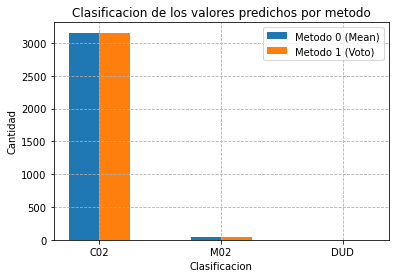

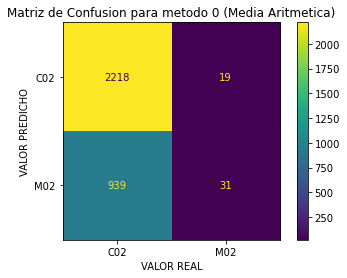

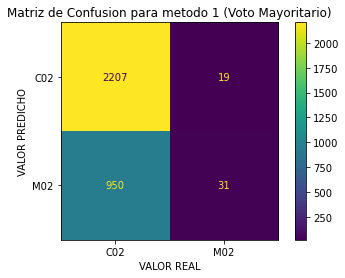

,MET,TN,FP,FN,TP,DUD,C02,M02,TNR,TPR,acc_bal
0,mean,31,19,939,2218,0,3157,50,0.62,0.702566,0.661283
1,voto,31,19,950,2207,0,3157,50,0.62,0.699081,0.659541


In [26]:
#project = 'Clasificacion_DUD_3D_DA_DM_DFAD_20C'
#project = 'Clasificacion_DUD_3D_DA_DM_DFAD'
project = 'Clasificacion_DUD_3D_DA_DM_DFAD'

# Umbrales                                                                                                        (C02,M02)
results, stats, listResult = getJoinStats(path_base, project, criterio='Validacion',dsTipo='Validacion', umbrales=[0.5,0.5]) 
stats

Estadisticas para el flag M02 con el metodo Mean
Cantidad de datos total    : 50
Cantidad de datos correctos: 31
Cantidad de datos erroneos : 19
Cantidad de datos dudosos  : 0


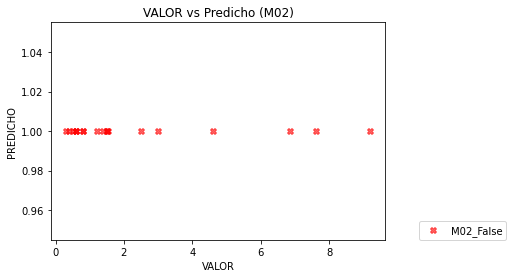

In [28]:
graficaScatterPrediciones(results, flag='M02',metodo='mean', dudosos=False, correcto=False)

Estadisticas para el flag C02 con el metodo Mean
Cantidad de datos total    : 3157
Cantidad de datos correctos: 2218
Cantidad de datos erroneos : 939
Cantidad de datos dudosos  : 0


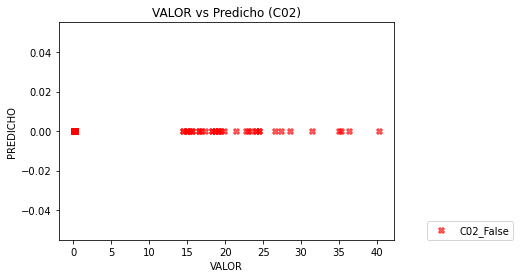

In [27]:
graficaScatterPrediciones(results, flag='C02',metodo='mean', dudosos=False, correcto=False)

In [24]:
listResult[0].min()

valores    0.000009
dtype: float64